In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

from sklearn.neighbors.nearest_centroid import NearestCentroid
from msslib.learn.cluster import CentroidVQ

from msslib.utils import *
from msslib.data import *

import random

In [3]:
label_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/labels/"
data_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/data/"    
label_paths = sorted(list(filter(lambda x: "RN" in x, listpaths(label_dir))))[6:]
data_paths = sorted(list(filter(lambda x: "RN" in x, listpaths(data_dir))))[6:]
path_pairs = list(zip(label_paths, data_paths))

In [4]:
split_at = 50
random.shuffle(path_pairs)
train = path_pairs[:split_at]
test = path_pairs[split_at:]

In [5]:
lda = LinearDiscriminantAnalysis()
clf_1 = NearestCentroid(shrink_threshold=0)
clf_2 = CentroidVQ()

In [6]:
for l, d in train:
    X = flatten_vector_matrix(np.load(d))
    y = np.squeeze(flatten_vector_matrix(np.load(l)))
    lda.fit(X, y)

/usr/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [7]:
for l, d in train:
    X = lda.transform(flatten_vector_matrix(np.load(d)))
    y = np.squeeze(flatten_vector_matrix(np.load(l)))
    clf_1.fit(X, y)
    clf_2.fit(X, y)

In [9]:
test_results = []
for l, d in test:
    X = lda.transform(flatten_vector_matrix(np.load(d)))
    y = np.squeeze(flatten_vector_matrix(np.load(l)))
    pred_1 = clf_1.predict(X)
    pred_2 = clf_2.predict(X)
    test_results.append({
            'name': only_basename(l),
            'pred_1': pred_1.reshape(120,90),
            'pred_2': pred_2.reshape(120,90),
        }
    )

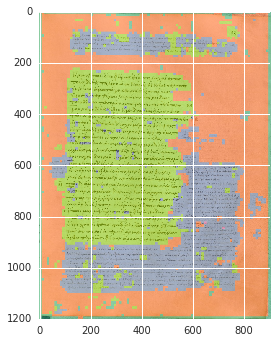

In [29]:
current = test_results[19]
orig_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/images/"
orig_img = misc.imread(format_path(orig_dir, 'jpg', current['name']))
col_label1 = label_colour_image(scale_matrix(current['pred_1'], 10))
col_label2 = label_colour_image(scale_matrix(current['pred_2'], 10))
plt.imshow(overlay_imgs(orig_img, col_label1))

In [11]:
xs = []
ys = []
for x, y in enumerate(test_results):
    xs.append(x)
    ys.append(y['score'])

NameError: name 'current' is not defined

In [ ]:
clf.centroids_